In [1]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay,recall_score

from IPython.display import clear_output

import pandas as pd
from KNN import KNN

import gc

import pickle

from sklearn.neighbors import KNeighborsClassifier

In [2]:
X=pd.read_csv('dataset/X.csv')
y=pd.read_csv('dataset/y.csv')

train_X,test_X,train_y,test_y=train_test_split(X,y,test_size=4000,train_size=10000,random_state=42)

del X,y
gc.collect()

0

In [3]:
def KNN_selector(X,Y):
           
    model=KNN()
    properties={'k':[5,10,20,30,50,100]}
    
    grid=GridSearchCV(model,properties,scoring="accuracy",cv=10, n_jobs=4,return_train_score=True,verbose=5)
    grid.fit(train_X.to_numpy(copy=True),train_y.to_numpy(copy=True).flatten())
    
    clear_output(wait=True)
    
    result=pd.DataFrame(grid.cv_results_)
    
    print ("Best Score: ", grid.best_score_)
    print ("Best Params: ", grid.best_params_)
    
    return grid.best_estimator_,result

In [4]:
#best_model,result=KNN_selector(train_X,train_y)

In [3]:
model=KNN(5)

In [4]:
model.fit(train_X.to_numpy(copy=True),train_y.to_numpy(copy=True))

In [5]:
data=model.predict(test_X.to_numpy(copy=True))

points:   0%|          | 0/4000 [00:00<?, ?it/s]

In [6]:
accuracy_score(test_y,data[0])

0.94875

In [8]:
accuracy_score(test_y,data[1])

IndexError: list index out of range

In [ ]:
accuracy_score(test_y,data[2])

0.13025

In [8]:
prova=KNeighborsClassifier()
prova.fit(train_X,train_y)

si=prova.predict(test_X)
accuracy_score(test_y,si)

/home/michele/.local/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.946

In [8]:
for x in range(4000):
    print(test_y.iloc[x],data[0][x])

class    8
Name: 46730, dtype: int64 7.0
class    4
Name: 48393, dtype: int64 0.0


IndexError: single positional indexer is out-of-bounds

In [ ]:
if 'best_model' in globals():
    
    model_filename = 'models/best_model_KNN.sav'
    pickle.dump(best_model, open(model_filename, 'wb'))

    result_filename = 'models/result_KNN.sav'
    pickle.dump(result, open(result_filename, 'wb'))

else:
    import pickle
    
    from KNN import KNN
    import pandas as pd
    
    from sklearn.model_selection import train_test_split
    
    from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay,recall_score
    
    import gc
    
    
    X=pd.read_csv('dataset/X.csv')
    y=pd.read_csv('dataset/y.csv')

    train_X,test_X,train_y,test_y=train_test_split(X,y,test_size=1000,train_size=6000,random_state=42)

    del X,y
    gc.collect()

    with open( "models/best_model_KNN.sav", "rb" ) as f:
        best_model = pickle.load(f)
    
    with open( "models/result_KNN.sav", "rb" ) as f:
        result = pickle.load(f)

In [ ]:
result[["param_k","mean_test_score","mean_train_score"]]

,param_k,mean_test_score,mean_train_score
0,5,0.009333,0.010370
1,10,0.011500,0.011500
2,20,0.010833,0.010833
3,30,0.010833,0.010611
4,50,0.008667,0.009685
5,100,0.009167,0.008981


In [ ]:
pred_y=best_model.predict(test_X.to_numpy(copy=True))

TypeError: object of type 'int' has no len()

In [ ]:
accuracy_score(test_y, pred_y)

0.014

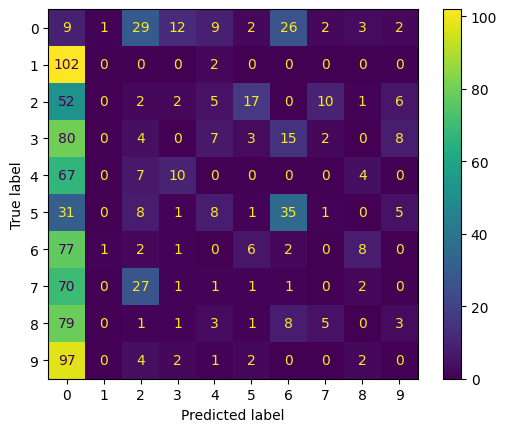

In [ ]:
cm = confusion_matrix(test_y, pred_y, labels=[x for x in range(10)])
ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[x for x in range(10)]).plot()